In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import operator
from wordcloud import WordCloud, STOPWORDS
import math

- Read dataset.

In [39]:
file_contents = pd.read_excel('global_terrorism_database.xlsx')

- Read Column headers.

In [38]:
columns = list(file_contents.columns.values)
year_distinct = set(i for i in file_contents['iyear'])

# Part 1

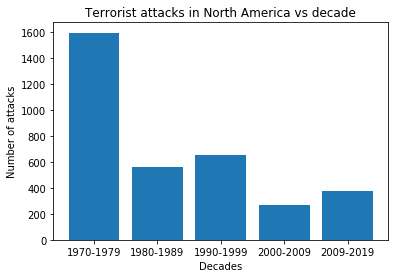

In [8]:
regions = set(i for i in file_contents['region_txt'])

northAmericanData = file_contents[file_contents.region_txt=='North America']
data = []

i = 1980
while i<=2020:
    d1  = len(northAmericanData[northAmericanData.iyear<i])
    i = i+10
    if len(data)!=0:
        d1 = d1-sum(data)
    data.append(d1)
    
year = ['1970-1979','1980-1989','1990-1999','2000-2009','2009-2019']

plt.bar(range(len(data)), data, align='center')
plt.xticks(range(len(year)), year)
plt.xlabel('Decades')
plt.ylabel('Number of attacks')
plt.title('Terrorist attacks in North America vs decade')
plt.show()

# Part 2

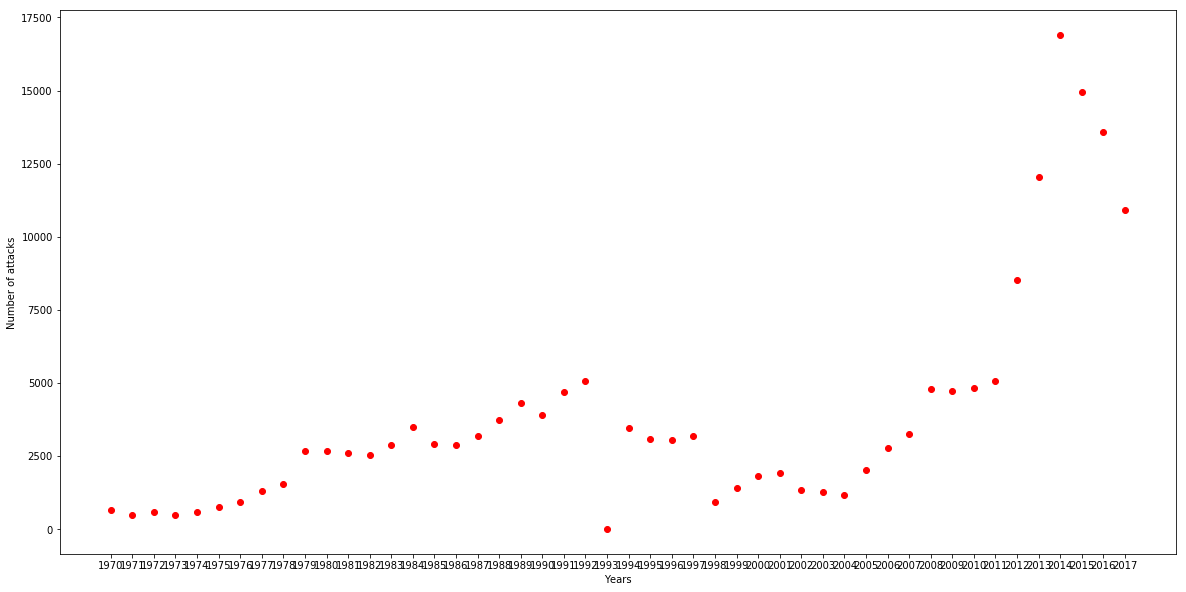

In [37]:
data = []

i = 1970
year = []
while i<=2017:
    year.append(i)
    d1  = len(file_contents[file_contents.iyear==i])
    i = i+1
    data.append(d1)

plt.scatter(year,data,color='r')
plt.xlabel('Years')
plt.gcf().set_size_inches((20, 10))    
plt.xticks(year)
plt.ylabel('Number of attacks')
plt.show()

In [41]:
max_year_index = data.index(max(data))
max_year = year[max_year_index]
# print(max_year,'had the highest number of terrorist attacks.')

### 2014 has the highest number of terrorist attacks.

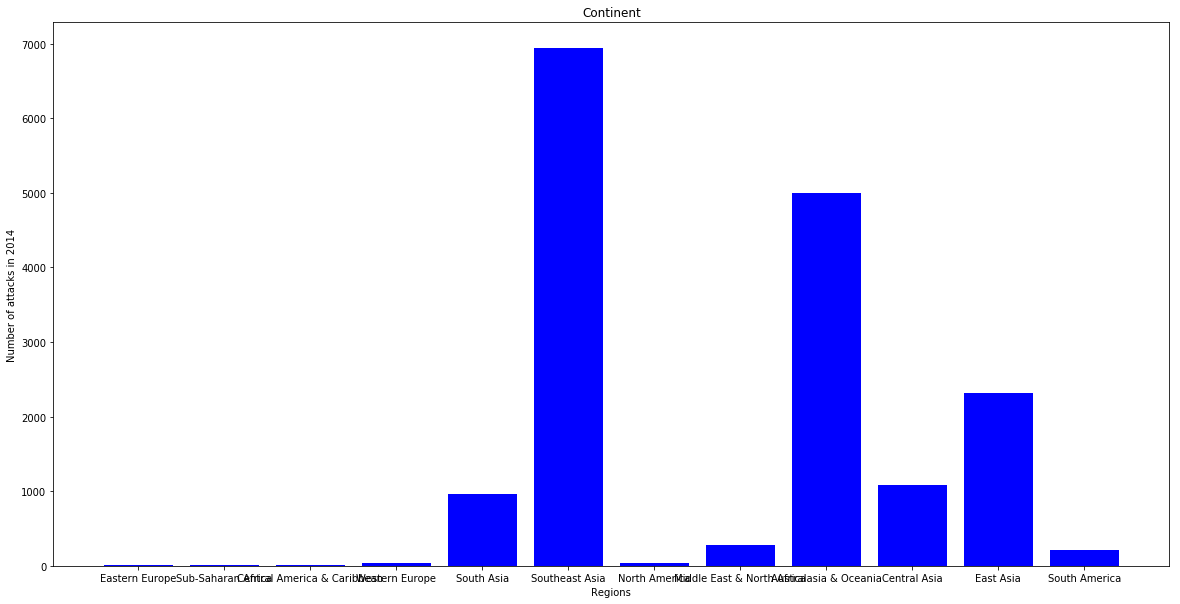

In [46]:
regions = set(i for i in file_contents['region_txt'])
dict_region_vals = {}
for i in regions:
    dict_region_vals[i]=0

max_terror_year_data = file_contents.loc[file_contents['iyear']==max_year]
all_regions = [i for i in max_terror_year_data['region_txt']]
# print(all_regions)
for i in all_regions:
    dict_region_vals[i]+=1

plt.bar(list(dict_region_vals.keys()),list(dict_region_vals.values()), color='b')
# plt.xscale('log')
plt.ylabel('Number of attacks in 2014')
plt.xlabel('Regions')
plt.xticks(list(dict_region_vals.keys()))
plt.gcf().set_size_inches((20, 10))    
plt.title('Continent')
plt.show()
# print(dict_region_vals)

In [49]:
max_region = max(dict_region_vals.items(), key=operator.itemgetter(1))[0]
# print(max_region)

### Maximum attacks occured in Middle East & North Africa region.

# Part 3

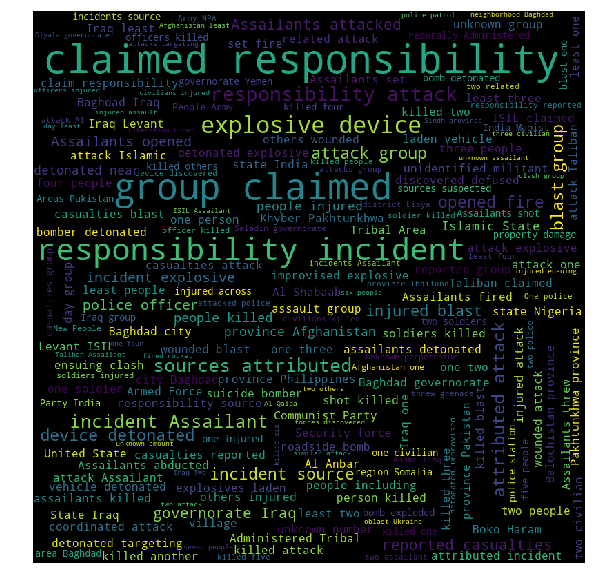

In [23]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in file_contents['summary']:
    val = str(val) 
    tokens = val.split()
    if len(tokens)==0:
        continue
    else:
        tokens = tokens[1:]
        comment_words+= ' '.join(tokens)
          
wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

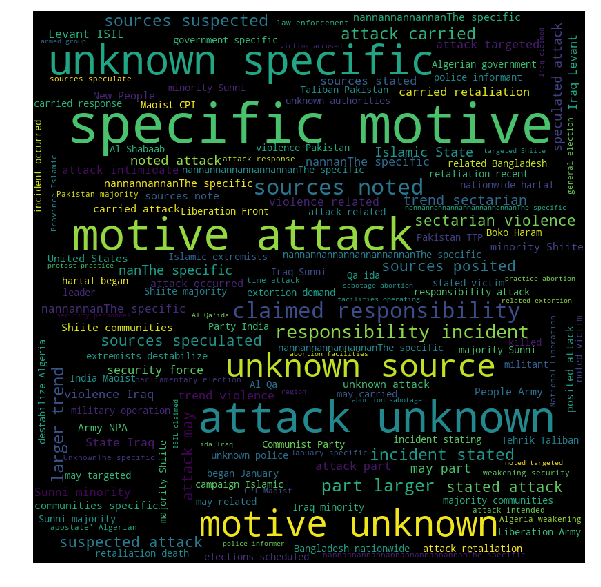

In [24]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in file_contents['motive']:
    val = str(val)
    tokens = val.split()
    comment_words+= ' '.join(tokens)
          
wordcloud = WordCloud(width = 800, height = 800, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

- 